In [1]:
import requests
import os
page = requests.get("https://www.worldometers.info/coronavirus")

In [2]:
url = 'https://www.worldometers.info/coronavirus'

In [3]:
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 76,395,043 Cases and 1,687,993 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<lin
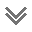

In [4]:
page.content

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(page.content, 'html.parser')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 76,395,043 Cases and 1,687,993 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x5
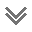

In [7]:
print(soup.prettify())

In [8]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [9]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_co

In [10]:
rows = table.find_all("tr", attrs={"style": ""})

In [11]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:15])
        
    else:
        data.append(item.text.strip().split("\n")[:15])

In [12]:
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop'],
 ['World',
  '76,395,043',
  '+402,274',
  '1,687,993',
  '+7,636',
  '53,563,836',
  '+293,679',
  '21,143,214',
  '106,487',
  '9,801',
  '216.6',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '17,955,616',
  '+67,263',
  '321,666 ',
  '+821',
  '10,422,214',
  '+27,928',
  '7,211,736',
  '27,977',
  '54,098',
  '969',
  '231,269,645',
  '696,790',
  '331,907,437 '],
 ['2',
  'India',
  '10,031,659',
  '+26,834',
  '145,513 ',
  '+342',
  '9,579,681',
  '+29,758',
  '306,465',
  '8,944',
  '7,236',
  '105',
  '160,090,514',
  '115,480',
  '1,386,308,397 '],
 ['3',
  'Brazil',
  '7,172,165',
  '+8,253',
  '185,827 ',
  '+140',
  '6,198,185',
  '',
  '788,153',
  '8,318',
  '33,631',
  '871',
  '25,700,000',
  '120,508',
  '213,263,040 '],


In [13]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
df = pd.DataFrame(data[1:], columns=data[0][:15])

In [14]:
df.head()

# Country,Other  TotalCases   NewCases TotalDeaths   NewDeaths  \
0  World    76,395,043    +402,274  1,687,993      +7,636  53,563,836   
1      1           USA  17,955,616    +67,263    321,666         +821   
2      2         India  10,031,659    +26,834    145,513         +342   
3      3        Brazil   7,172,165     +8,253    185,827         +140   
4      4        Russia   2,819,429    +28,209     50,347         +585   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +293,679   21,143,214     106,487            9,801            216.6   
1     10,422,214      +27,928   7,211,736           27,977           54,098   
2      9,579,681      +29,758     306,465            8,944            7,236   
3      6,198,185                  788,153            8,318           33,631   
4      2,254,742      +26,109     514,340            2,300           19,316   

  Deaths/1M pop   TotalTests   Tests/          1M pop  
0                                                 All  
1           969  231,269,645  696,790    331,907,437   
2           105  160,090,514  115,480  1,386,308,397   
3           871   25,700,000  120,508    213,263,040   
4           345   84,904,111  581,679    145,963,756

In [15]:
world_data_df = df
world_data_df.head()

# Country,Other  TotalCases   NewCases TotalDeaths   NewDeaths  \
0  World    76,395,043    +402,274  1,687,993      +7,636  53,563,836   
1      1           USA  17,955,616    +67,263    321,666         +821   
2      2         India  10,031,659    +26,834    145,513         +342   
3      3        Brazil   7,172,165     +8,253    185,827         +140   
4      4        Russia   2,819,429    +28,209     50,347         +585   

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +293,679   21,143,214     106,487            9,801            216.6   
1     10,422,214      +27,928   7,211,736           27,977           54,098   
2      9,579,681      +29,758     306,465            8,944            7,236   
3      6,198,185                  788,153            8,318           33,631   
4      2,254,742      +26,109     514,340            2,300           19,316   

  Deaths/1M pop   TotalTests   Tests/          1M pop  
0                                                 All  
1           969  231,269,645  696,790    331,907,437   
2           105  160,090,514  115,480  1,386,308,397   
3           871   25,700,000  120,508    213,263,040   
4           345   84,904,111  581,679    145,963,756

In [16]:
world_data_1_df = world_data_df.drop(columns = {'NewCases', 'NewDeaths', 'NewRecovered', 'Serious,Critical', 'Deaths/1M pop', 'Tests/', 'Tot\xa0Cases/1M pop'})
world_data_1_df.head()

# Country,Other  TotalCases TotalDeaths TotalRecovered ActiveCases  \
0  World    76,395,043    +402,274      +7,636       +293,679     106,487   
1      1           USA  17,955,616    321,666      10,422,214   7,211,736   
2      2         India  10,031,659    145,513       9,579,681     306,465   
3      3        Brazil   7,172,165    185,827       6,198,185     788,153   
4      4        Russia   2,819,429     50,347       2,254,742     514,340   

    TotalTests          1M pop  
0                          All  
1  231,269,645    331,907,437   
2  160,090,514  1,386,308,397   
3   25,700,000    213,263,040   
4   84,904,111    145,963,756

In [17]:
world_data_2_df = world_data_1_df.rename(
    columns= {"#": "id",
              "Country,Other":"Country",
              "TotalCases":"Total_Cases",
              "TotalDeaths":"Total_Deaths",
              "TotalRecovered":"Total_Recovered",
              "ActiveCases":"Active_Cases",
              "TotalTests":"Total_Tests",
              "1M pop":"Population"
             })
world_data_2_df.head()

id     Country Total_Cases Total_Deaths Total_Recovered Active_Cases  \
0  World  76,395,043    +402,274       +7,636        +293,679      106,487   
1      1         USA  17,955,616     321,666       10,422,214    7,211,736   
2      2       India  10,031,659     145,513        9,579,681      306,465   
3      3      Brazil   7,172,165     185,827        6,198,185      788,153   
4      4      Russia   2,819,429      50,347        2,254,742      514,340   

   Total_Tests      Population  
0                          All  
1  231,269,645    331,907,437   
2  160,090,514  1,386,308,397   
3   25,700,000    213,263,040   
4   84,904,111    145,963,756

In [18]:
world_data_2_df.dtypes

id                 object
Country            object
Total_Cases        object
Total_Deaths       object
Total_Recovered    object
Active_Cases       object
Total_Tests        object
Population         object
dtype: object

In [19]:
world_data_2_df.head()

id     Country Total_Cases Total_Deaths Total_Recovered Active_Cases  \
0  World  76,395,043    +402,274       +7,636        +293,679      106,487   
1      1         USA  17,955,616     321,666       10,422,214    7,211,736   
2      2       India  10,031,659     145,513        9,579,681      306,465   
3      3      Brazil   7,172,165     185,827        6,198,185      788,153   
4      4      Russia   2,819,429      50,347        2,254,742      514,340   

   Total_Tests      Population  
0                          All  
1  231,269,645    331,907,437   
2  160,090,514  1,386,308,397   
3   25,700,000    213,263,040   
4   84,904,111    145,963,756

In [20]:
cols = ['id', 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Total_Tests', 'Population']
world_data_2_df[cols] = world_data_2_df[cols].replace({'\$': '', ',': ''}, regex=True)

In [21]:
world_data_2_df.head()

id     Country Total_Cases Total_Deaths Total_Recovered Active_Cases  \
0  World  76,395,043     +402274        +7636         +293679       106487   
1      1         USA    17955616      321666         10422214      7211736   
2      2       India    10031659      145513          9579681       306465   
3      3      Brazil     7172165      185827          6198185       788153   
4      4      Russia     2819429       50347          2254742       514340   

  Total_Tests   Population  
0                      All  
1   231269645   331907437   
2   160090514  1386308397   
3    25700000   213263040   
4    84904111   145963756

In [22]:
world_data_3_df = world_data_2_df.drop(world_data_2_df.index[0])

In [23]:
world_data_3_df.head()

id Country Total_Cases Total_Deaths Total_Recovered Active_Cases  \
1  1     USA    17955616      321666         10422214      7211736   
2  2   India    10031659      145513          9579681       306465   
3  3  Brazil     7172165      185827          6198185       788153   
4  4  Russia     2819429       50347          2254742       514340   
5  5  France     2460555       60418           183571      2216566   

  Total_Tests   Population  
1   231269645   331907437   
2   160090514  1386308397   
3    25700000   213263040   
4    84904111   145963756   
5    30346777    65341034

In [24]:
world_data_3_df['id'] = pd.to_numeric(world_data_3_df['id'], errors='coerce').astype('Int64')
world_data_3_df['Total_Cases'] = pd.to_numeric(world_data_3_df['Total_Cases'], errors='coerce').astype('Int64')
world_data_3_df['Total_Deaths'] = pd.to_numeric(world_data_3_df['Total_Deaths'], errors='coerce').astype('Int64')
world_data_3_df['Total_Recovered'] = pd.to_numeric(world_data_3_df['Total_Recovered'], errors='coerce').astype('Int64')
world_data_3_df['Active_Cases'] = pd.to_numeric(world_data_3_df['Active_Cases'], errors='coerce').astype('Int64')
world_data_3_df['Total_Tests'] = pd.to_numeric(world_data_3_df['Total_Tests'], errors='coerce').astype('Int64')
world_data_3_df['Population'] = pd.to_numeric(world_data_3_df['Population'], errors='coerce').astype('Int64')

In [25]:
world_data_3_df.head()

id Country  Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  \
1   1     USA     17955616        321666         10422214       7211736   
2   2   India     10031659        145513          9579681        306465   
3   3  Brazil      7172165        185827          6198185        788153   
4   4  Russia      2819429         50347          2254742        514340   
5   5  France      2460555         60418           183571       2216566   

   Total_Tests  Population  
1    231269645   331907437  
2    160090514  1386308397  
3     25700000   213263040  
4     84904111   145963756  
5     30346777    65341034

In [26]:
world_data_3_df.dtypes

id                  Int64
Country            object
Total_Cases         Int64
Total_Deaths        Int64
Total_Recovered     Int64
Active_Cases        Int64
Total_Tests         Int64
Population          Int64
dtype: object

In [27]:
world_data_3_df.head()

id Country  Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  \
1   1     USA     17955616        321666         10422214       7211736   
2   2   India     10031659        145513          9579681        306465   
3   3  Brazil      7172165        185827          6198185        788153   
4   4  Russia      2819429         50347          2254742        514340   
5   5  France      2460555         60418           183571       2216566   

   Total_Tests  Population  
1    231269645   331907437  
2    160090514  1386308397  
3     25700000   213263040  
4     84904111   145963756  
5     30346777    65341034

In [28]:
world_data_4_df = world_data_3_df.dropna()

In [29]:
world_data_4_df.head()

id Country  Total_Cases  Total_Deaths  Total_Recovered  Active_Cases  \
1   1     USA     17955616        321666         10422214       7211736   
2   2   India     10031659        145513          9579681        306465   
3   3  Brazil      7172165        185827          6198185        788153   
4   4  Russia      2819429         50347          2254742        514340   
5   5  France      2460555         60418           183571       2216566   

   Total_Tests  Population  
1    231269645   331907437  
2    160090514  1386308397  
3     25700000   213263040  
4     84904111   145963756  
5     30346777    65341034

In [30]:
list(world_data_4_df)

['id',
 'Country',
 'Total_Cases',
 'Total_Deaths',
 'Total_Recovered',
 'Active_Cases',
 'Total_Tests',
 'Population']